# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

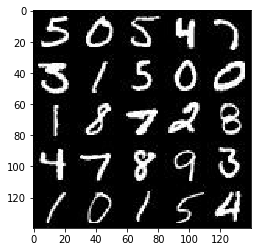

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

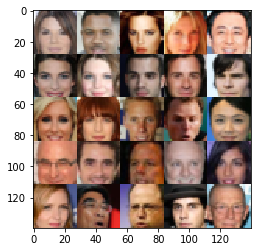

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32,name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [73]:
def discriminator(images, reuse=False, alpha=0.09):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
       
        x1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        #x1 = tf.layers.dropout(x1, rate = 0.5, training=True)
        #14*14
        x2 =tf.layers.conv2d(x1,128,5,strides=2,padding='same')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        #x2 = tf.layers.dropout(x2, rate = 0.5, training=True)
        
        #7*7
        x3 =tf.layers.conv2d(x2,256,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        #x3 = tf.layers.dropout(x3, rate = 0.5, training=True)
        #4*4
        flat = tf.reshape(x3, (-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [74]:
def generator(z, out_channel_dim, is_train=True, reuse=False, alpha=0.09):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
        alpha = 0.09
        x1 = tf.layers.dense(z, 4*4*512)
        x1 = tf.reshape(x1, (-1,4,4,512))
        x1 = tf.layers.batch_normalization(x1, training =is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #UNSUPERVISED REPRESENTATION LEARNING WITH DEEP CONVOLUTIONAL
        #GENERATIVE ADVERSARIAL NETWORKS
        #x1= tf.nn.relu(x1)
        #x1 = tf.layers.dropout(x1, rate = 0.5, training=is_train)
        
        #4*4*512
        #https://github.com/tensorflow/tensorflow/issues/2118
        x2 = tf.layers.conv2d_transpose(x1,256,4,strides=1,padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #x2= tf.nn.relu(x2)
        #x2 = tf.layers.dropout(x2, rate = 0.5,  training=is_train)
        #7*7*256
        x3 = tf.layers.conv2d_transpose(x2,128,5,strides=2,padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #x3= tf.nn.relu(x3)
        #x3 = tf.layers.dropout(x3, rate = 0.5,  training=is_train)
        #14*14*128
        logits = tf.layers.conv2d_transpose(x3,out_channel_dim,5,strides=2,padding='same')
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [76]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.09):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    fake_images = generator(input_z, out_channel_dim, is_train=True,alpha=alpha)
    real_out, real_logit = discriminator(input_real,reuse=False,alpha=alpha)
    fake_out, fake_logit = discriminator(fake_images,reuse=True,alpha=alpha)
    
    smooth = 0.1
    
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_logit, 
                                                        labels=tf.ones_like(real_logit) * (1. - smooth)))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logit, 
                                                        labels=tf.zeros_like(real_logit)))
    
    d_loss = d_real_loss + d_fake_loss
    
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_logit, 
                                                        labels=tf.ones_like(fake_logit)))
        
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [77]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [78]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [79]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,alpha=0.09):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    # TODO: Build Model
    image_channels = 1
    if data_image_mode == 'RGB':
        image_channels = 3
        
    input_real, input_z,lr = model_inputs(data_shape[1], data_shape[2],image_channels,z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z,image_channels,alpha)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size,z_dim)) * 2
                
               
                # Run optimizers
                # https://github.com/soumith/ganhacks
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr:learning_rate})
              
                
                if steps % 50 == 0:
                    # At the end of each batch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real:  batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                steps = steps + 1
        show_generator_output(sess, 25, input_z, image_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 7.6786... Generator Loss: 0.0011


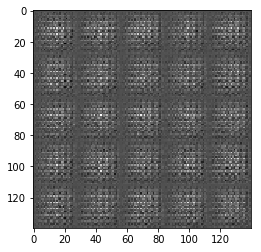

Epoch 1/2... Discriminator Loss: 2.4762... Generator Loss: 0.1776
Epoch 1/2... Discriminator Loss: 1.4199... Generator Loss: 1.2926


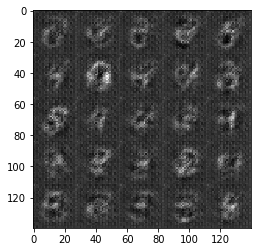

Epoch 1/2... Discriminator Loss: 1.7999... Generator Loss: 0.2948
Epoch 1/2... Discriminator Loss: 1.8545... Generator Loss: 0.2601


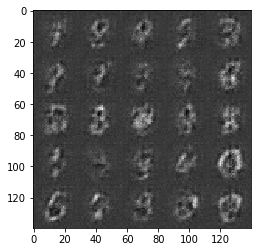

Epoch 1/2... Discriminator Loss: 1.2354... Generator Loss: 0.6305
Epoch 1/2... Discriminator Loss: 1.8415... Generator Loss: 0.2732


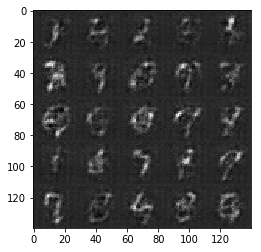

Epoch 1/2... Discriminator Loss: 1.2652... Generator Loss: 0.6025
Epoch 1/2... Discriminator Loss: 0.9686... Generator Loss: 0.8757


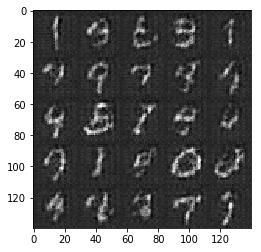

Epoch 1/2... Discriminator Loss: 0.7912... Generator Loss: 1.2489
Epoch 1/2... Discriminator Loss: 0.7948... Generator Loss: 1.2051


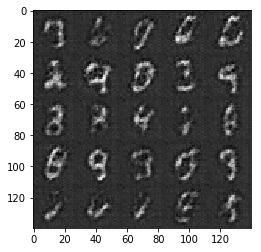

Epoch 1/2... Discriminator Loss: 1.2832... Generator Loss: 0.6772
Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 0.7635


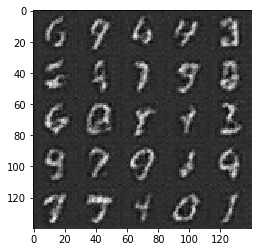

Epoch 1/2... Discriminator Loss: 0.9356... Generator Loss: 0.8879
Epoch 1/2... Discriminator Loss: 0.9139... Generator Loss: 0.8910


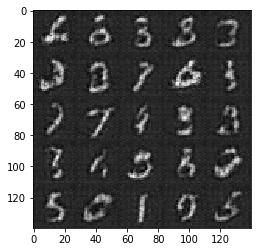

Epoch 1/2... Discriminator Loss: 1.5488... Generator Loss: 0.3985
Epoch 1/2... Discriminator Loss: 1.5458... Generator Loss: 0.4198


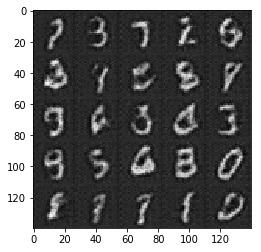

Epoch 1/2... Discriminator Loss: 0.5931... Generator Loss: 1.6271
Epoch 1/2... Discriminator Loss: 1.9629... Generator Loss: 0.2614


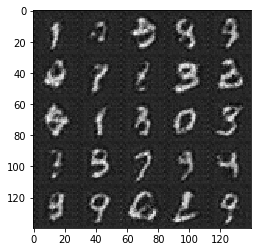

Epoch 1/2... Discriminator Loss: 2.1812... Generator Loss: 0.2187
Epoch 1/2... Discriminator Loss: 0.4622... Generator Loss: 3.6245


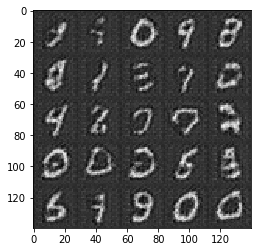

Epoch 1/2... Discriminator Loss: 0.4874... Generator Loss: 2.6169
Epoch 1/2... Discriminator Loss: 0.4026... Generator Loss: 3.0658


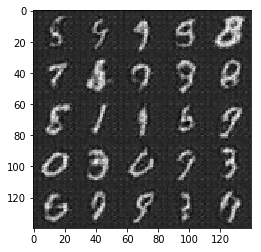

Epoch 1/2... Discriminator Loss: 0.4546... Generator Loss: 2.3310
Epoch 1/2... Discriminator Loss: 0.4370... Generator Loss: 4.3939


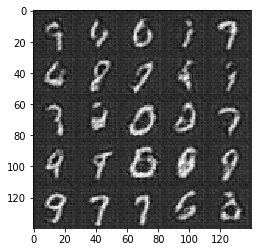

Epoch 1/2... Discriminator Loss: 0.5779... Generator Loss: 2.3458
Epoch 1/2... Discriminator Loss: 0.5022... Generator Loss: 2.0478


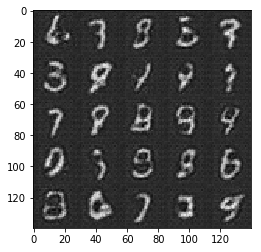

Epoch 1/2... Discriminator Loss: 0.9890... Generator Loss: 0.9446
Epoch 1/2... Discriminator Loss: 0.4326... Generator Loss: 6.1647


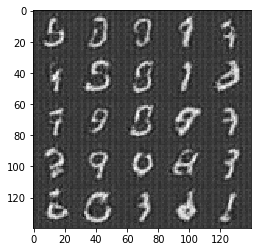

Epoch 1/2... Discriminator Loss: 0.6915... Generator Loss: 1.3643
Epoch 1/2... Discriminator Loss: 0.5518... Generator Loss: 4.7513


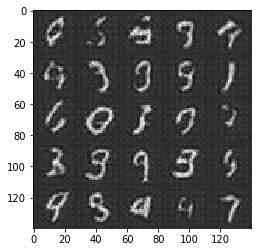

Epoch 1/2... Discriminator Loss: 0.8651... Generator Loss: 1.4983
Epoch 1/2... Discriminator Loss: 0.5430... Generator Loss: 1.8308


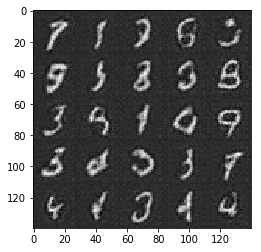

Epoch 1/2... Discriminator Loss: 1.1496... Generator Loss: 0.6729
Epoch 1/2... Discriminator Loss: 0.9929... Generator Loss: 1.1084


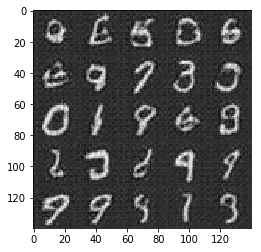

Epoch 1/2... Discriminator Loss: 0.5731... Generator Loss: 2.1991
Epoch 1/2... Discriminator Loss: 1.2282... Generator Loss: 0.6148


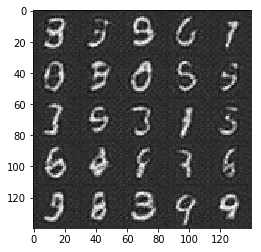

Epoch 1/2... Discriminator Loss: 0.3484... Generator Loss: 4.3428
Epoch 2/2... Discriminator Loss: 1.4692... Generator Loss: 0.4365


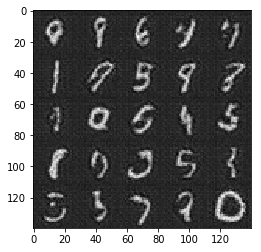

Epoch 2/2... Discriminator Loss: 0.4302... Generator Loss: 2.7392
Epoch 2/2... Discriminator Loss: 1.0238... Generator Loss: 0.9938


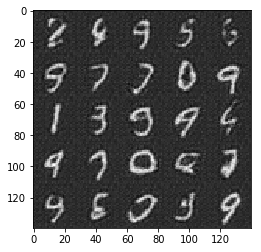

Epoch 2/2... Discriminator Loss: 0.3537... Generator Loss: 4.5503
Epoch 2/2... Discriminator Loss: 1.1185... Generator Loss: 0.6985


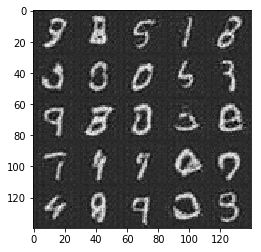

Epoch 2/2... Discriminator Loss: 1.0329... Generator Loss: 0.8712
Epoch 2/2... Discriminator Loss: 0.7377... Generator Loss: 1.2770


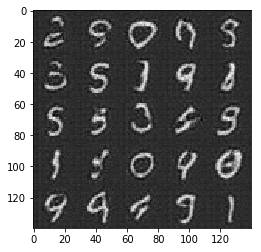

Epoch 2/2... Discriminator Loss: 2.1114... Generator Loss: 0.2139
Epoch 2/2... Discriminator Loss: 0.9125... Generator Loss: 2.0552


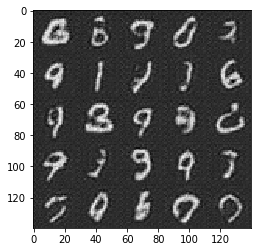

Epoch 2/2... Discriminator Loss: 1.9207... Generator Loss: 0.2670
Epoch 2/2... Discriminator Loss: 0.4358... Generator Loss: 3.6955


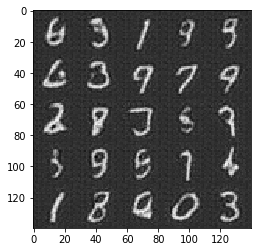

Epoch 2/2... Discriminator Loss: 0.9771... Generator Loss: 0.8287
Epoch 2/2... Discriminator Loss: 0.8260... Generator Loss: 1.1793


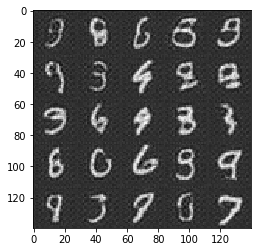

Epoch 2/2... Discriminator Loss: 1.3178... Generator Loss: 0.5185
Epoch 2/2... Discriminator Loss: 0.8728... Generator Loss: 1.1504


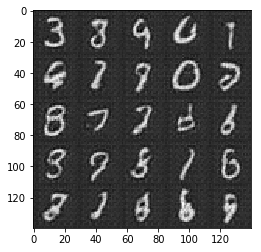

Epoch 2/2... Discriminator Loss: 0.4193... Generator Loss: 2.7494
Epoch 2/2... Discriminator Loss: 1.1560... Generator Loss: 0.6465


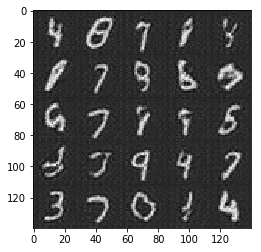

Epoch 2/2... Discriminator Loss: 0.9288... Generator Loss: 0.9224
Epoch 2/2... Discriminator Loss: 0.8061... Generator Loss: 1.1267


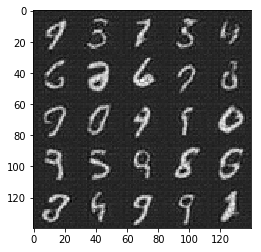

Epoch 2/2... Discriminator Loss: 0.6624... Generator Loss: 2.1158
Epoch 2/2... Discriminator Loss: 0.5169... Generator Loss: 2.0060


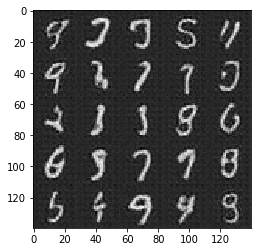

Epoch 2/2... Discriminator Loss: 1.2145... Generator Loss: 0.6667
Epoch 2/2... Discriminator Loss: 2.6159... Generator Loss: 0.1680


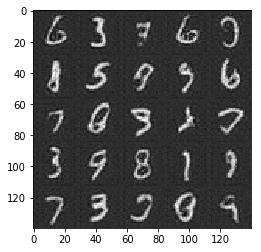

Epoch 2/2... Discriminator Loss: 1.0105... Generator Loss: 1.5852
Epoch 2/2... Discriminator Loss: 1.9843... Generator Loss: 0.2586


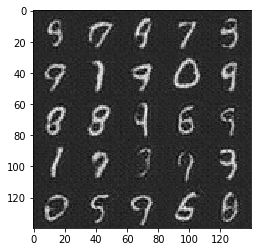

Epoch 2/2... Discriminator Loss: 1.2495... Generator Loss: 0.6301
Epoch 2/2... Discriminator Loss: 1.5613... Generator Loss: 3.3026


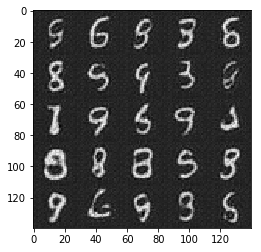

Epoch 2/2... Discriminator Loss: 0.6083... Generator Loss: 1.6756
Epoch 2/2... Discriminator Loss: 2.3471... Generator Loss: 0.1919


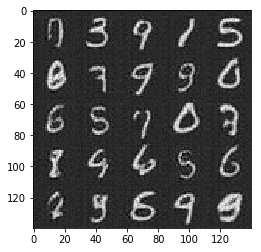

Epoch 2/2... Discriminator Loss: 2.4209... Generator Loss: 0.1650
Epoch 2/2... Discriminator Loss: 1.4101... Generator Loss: 0.5305


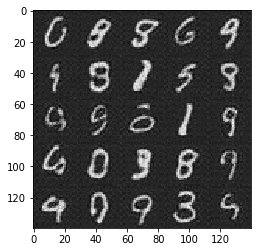

Epoch 2/2... Discriminator Loss: 1.4111... Generator Loss: 0.4438
Epoch 2/2... Discriminator Loss: 0.8832... Generator Loss: 1.5519


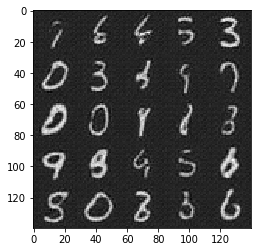

Epoch 2/2... Discriminator Loss: 1.1997... Generator Loss: 0.6474
Epoch 2/2... Discriminator Loss: 3.1498... Generator Loss: 0.1035


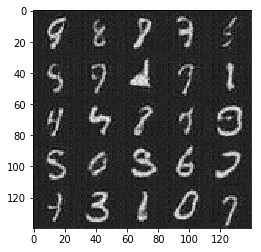

Epoch 2/2... Discriminator Loss: 1.0785... Generator Loss: 0.7585
Epoch 2/2... Discriminator Loss: 1.1200... Generator Loss: 0.6834


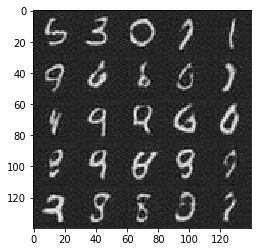

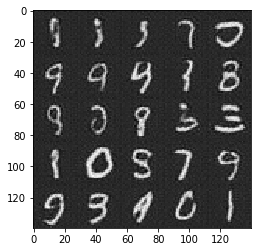

In [80]:
batch_size = 32
z_dim = 100
learning_rate = 0.0003
beta1 = 0.3
alpha = 0.08

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 6.5890... Generator Loss: 0.0024


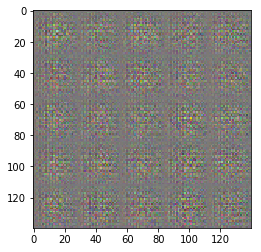

Epoch 1/1... Discriminator Loss: 1.0607... Generator Loss: 2.6890
Epoch 1/1... Discriminator Loss: 0.8572... Generator Loss: 1.2127


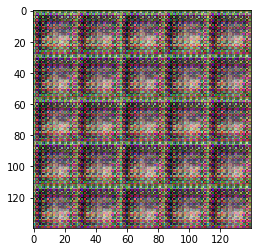

Epoch 1/1... Discriminator Loss: 0.5483... Generator Loss: 2.5252
Epoch 1/1... Discriminator Loss: 0.4866... Generator Loss: 2.2233


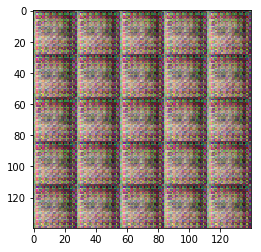

Epoch 1/1... Discriminator Loss: 0.5755... Generator Loss: 1.6341
Epoch 1/1... Discriminator Loss: 1.2048... Generator Loss: 0.9201


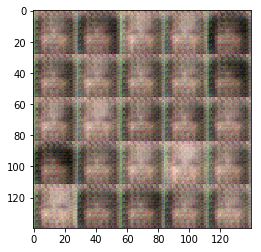

Epoch 1/1... Discriminator Loss: 1.5519... Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 1.5692... Generator Loss: 0.8200


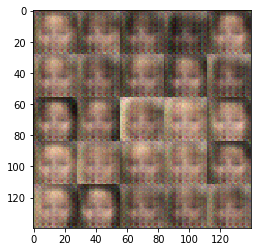

Epoch 1/1... Discriminator Loss: 1.6266... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 1.5757... Generator Loss: 0.5641


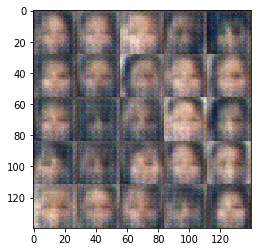

Epoch 1/1... Discriminator Loss: 1.5931... Generator Loss: 0.6978
Epoch 1/1... Discriminator Loss: 1.4945... Generator Loss: 0.7257


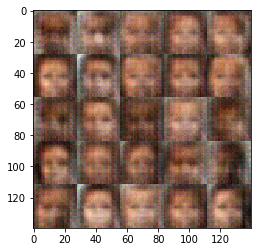

Epoch 1/1... Discriminator Loss: 1.4664... Generator Loss: 0.5773
Epoch 1/1... Discriminator Loss: 1.4599... Generator Loss: 0.7823


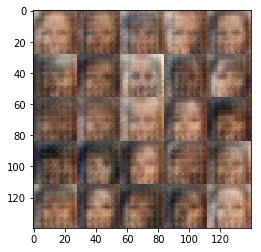

Epoch 1/1... Discriminator Loss: 1.7077... Generator Loss: 0.3396
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.7070


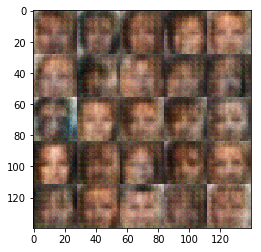

Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 2.9670
Epoch 1/1... Discriminator Loss: 1.2181... Generator Loss: 0.6419


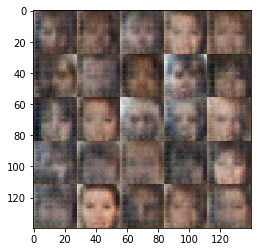

Epoch 1/1... Discriminator Loss: 0.6653... Generator Loss: 1.8885
Epoch 1/1... Discriminator Loss: 2.2576... Generator Loss: 0.1676


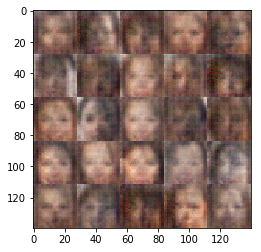

Epoch 1/1... Discriminator Loss: 1.1337... Generator Loss: 3.2982
Epoch 1/1... Discriminator Loss: 1.8320... Generator Loss: 0.2852


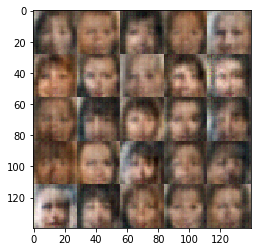

Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.9137
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 1.4395


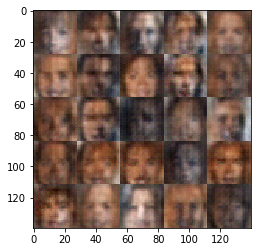

Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.7510


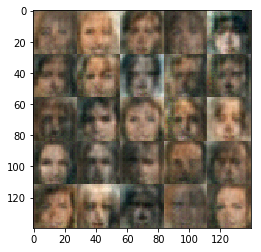

Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.7247
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.7336


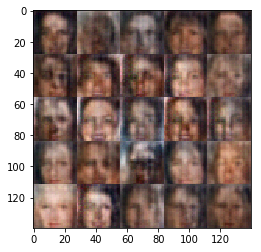

Epoch 1/1... Discriminator Loss: 1.7555... Generator Loss: 0.3202
Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 1.0394


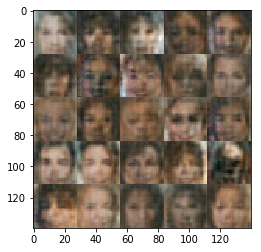

Epoch 1/1... Discriminator Loss: 1.7895... Generator Loss: 0.3130
Epoch 1/1... Discriminator Loss: 1.7530... Generator Loss: 0.3130


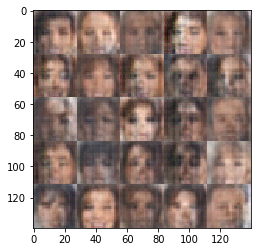

Epoch 1/1... Discriminator Loss: 1.5235... Generator Loss: 0.6026
Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.5650


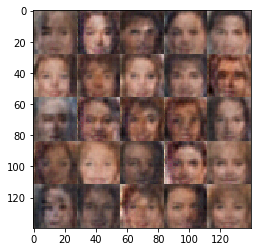

Epoch 1/1... Discriminator Loss: 1.4153... Generator Loss: 0.7485
Epoch 1/1... Discriminator Loss: 1.5800... Generator Loss: 0.5210


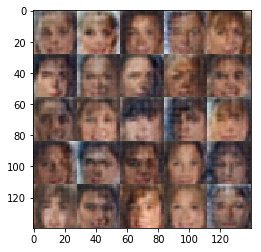

Epoch 1/1... Discriminator Loss: 1.4950... Generator Loss: 0.4405
Epoch 1/1... Discriminator Loss: 1.2887... Generator Loss: 0.7772


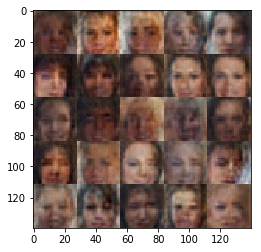

Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.6303
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 1.5429


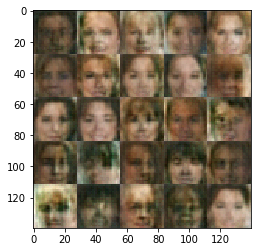

Epoch 1/1... Discriminator Loss: 1.4428... Generator Loss: 0.5729
Epoch 1/1... Discriminator Loss: 1.7601... Generator Loss: 0.9190


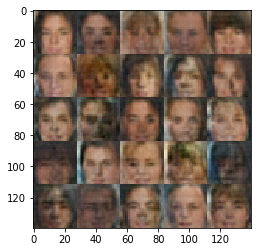

Epoch 1/1... Discriminator Loss: 1.3770... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.6795


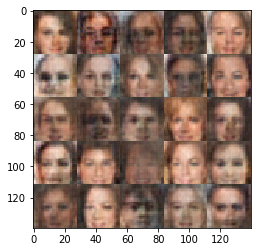

Epoch 1/1... Discriminator Loss: 1.5166... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.5818... Generator Loss: 0.5342


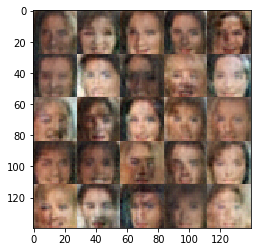

Epoch 1/1... Discriminator Loss: 1.8554... Generator Loss: 0.2832
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 0.6803


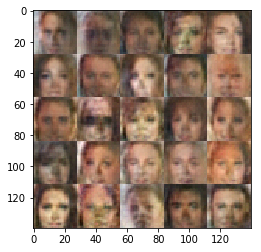

Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 1.2921
Epoch 1/1... Discriminator Loss: 1.5481... Generator Loss: 0.5888


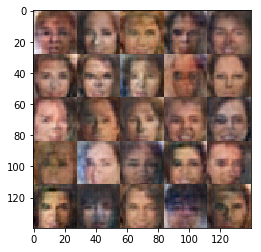

Epoch 1/1... Discriminator Loss: 1.5478... Generator Loss: 0.5196
Epoch 1/1... Discriminator Loss: 1.4344... Generator Loss: 0.7839


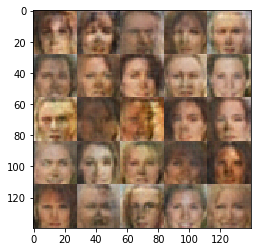

Epoch 1/1... Discriminator Loss: 1.5944... Generator Loss: 0.3911
Epoch 1/1... Discriminator Loss: 1.5288... Generator Loss: 0.5537


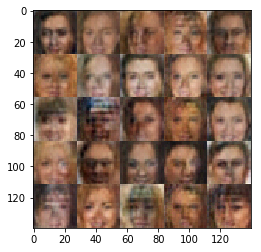

Epoch 1/1... Discriminator Loss: 1.5532... Generator Loss: 0.5933
Epoch 1/1... Discriminator Loss: 1.6877... Generator Loss: 0.4017


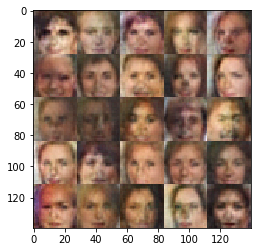

Epoch 1/1... Discriminator Loss: 1.6132... Generator Loss: 1.5066
Epoch 1/1... Discriminator Loss: 1.5186... Generator Loss: 0.4931


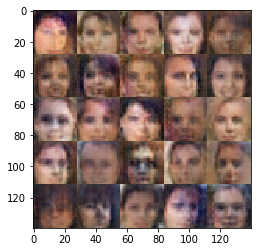

Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.5362
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.5920


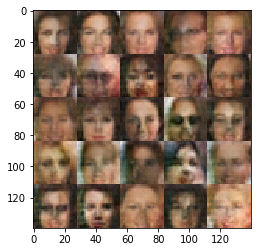

Epoch 1/1... Discriminator Loss: 1.5774... Generator Loss: 0.4220
Epoch 1/1... Discriminator Loss: 1.5143... Generator Loss: 0.6194


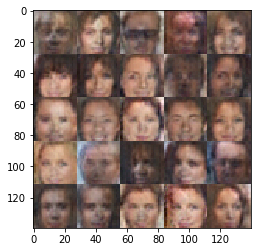

Epoch 1/1... Discriminator Loss: 1.7462... Generator Loss: 0.3176
Epoch 1/1... Discriminator Loss: 1.1185... Generator Loss: 0.8223


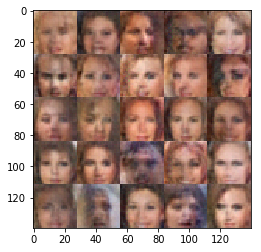

Epoch 1/1... Discriminator Loss: 1.7050... Generator Loss: 0.4129
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7850


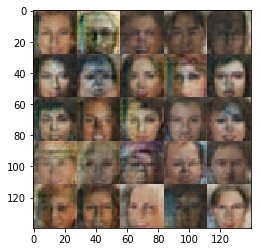

Epoch 1/1... Discriminator Loss: 1.6363... Generator Loss: 0.4336
Epoch 1/1... Discriminator Loss: 1.6789... Generator Loss: 0.4126


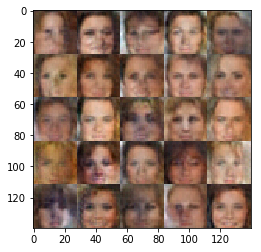

Epoch 1/1... Discriminator Loss: 1.9350... Generator Loss: 0.2711
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.6222


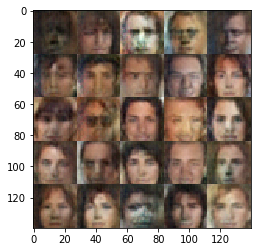

Epoch 1/1... Discriminator Loss: 1.7012... Generator Loss: 0.4532
Epoch 1/1... Discriminator Loss: 2.0637... Generator Loss: 0.2350


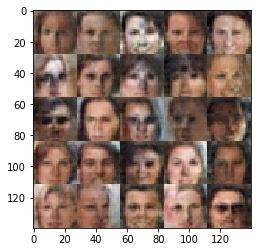

Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.6441


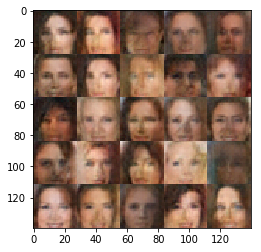

Epoch 1/1... Discriminator Loss: 1.7642... Generator Loss: 0.3266
Epoch 1/1... Discriminator Loss: 1.5823... Generator Loss: 0.5133


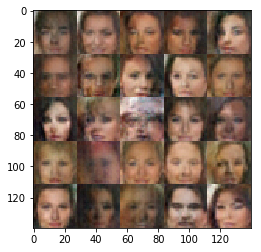

Epoch 1/1... Discriminator Loss: 1.7903... Generator Loss: 0.2938
Epoch 1/1... Discriminator Loss: 1.7412... Generator Loss: 0.3159


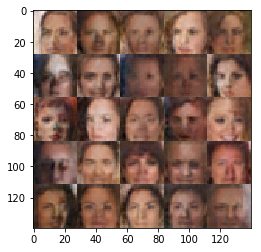

Epoch 1/1... Discriminator Loss: 1.7067... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 2.1166... Generator Loss: 0.2195


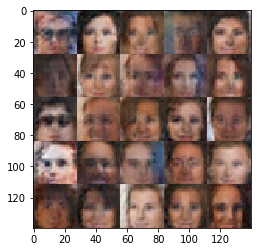

Epoch 1/1... Discriminator Loss: 1.6440... Generator Loss: 0.3772
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.6107


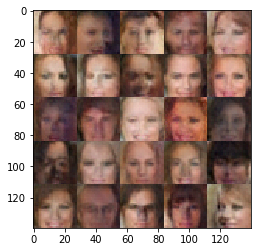

Epoch 1/1... Discriminator Loss: 1.5072... Generator Loss: 0.5263
Epoch 1/1... Discriminator Loss: 1.5852... Generator Loss: 0.5084


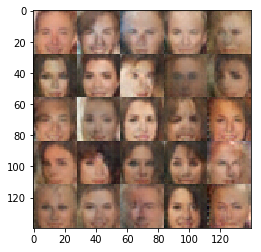

Epoch 1/1... Discriminator Loss: 1.6606... Generator Loss: 0.3854
Epoch 1/1... Discriminator Loss: 1.8533... Generator Loss: 0.3308


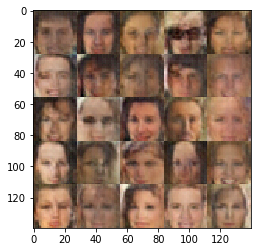

Epoch 1/1... Discriminator Loss: 2.0358... Generator Loss: 0.2346
Epoch 1/1... Discriminator Loss: 1.7404... Generator Loss: 0.3122


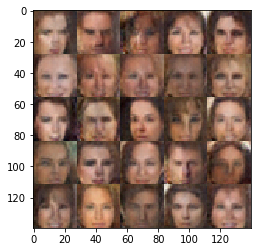

Epoch 1/1... Discriminator Loss: 1.7672... Generator Loss: 0.3595
Epoch 1/1... Discriminator Loss: 1.7569... Generator Loss: 0.3820


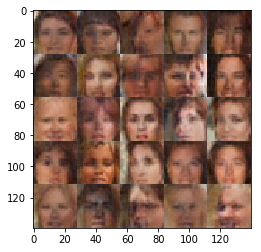

Epoch 1/1... Discriminator Loss: 1.5013... Generator Loss: 0.6355
Epoch 1/1... Discriminator Loss: 1.6508... Generator Loss: 0.6517


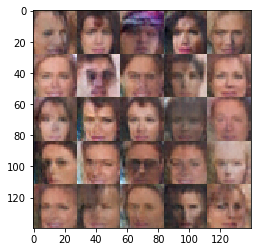

Epoch 1/1... Discriminator Loss: 1.5853... Generator Loss: 0.3786
Epoch 1/1... Discriminator Loss: 1.9810... Generator Loss: 0.2406


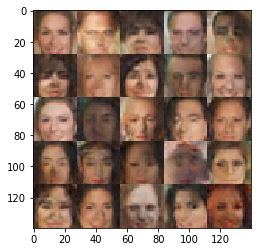

Epoch 1/1... Discriminator Loss: 1.5506... Generator Loss: 0.6052
Epoch 1/1... Discriminator Loss: 1.6818... Generator Loss: 0.3726


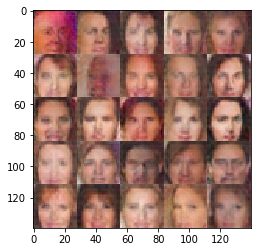

Epoch 1/1... Discriminator Loss: 1.5095... Generator Loss: 0.5375
Epoch 1/1... Discriminator Loss: 1.9348... Generator Loss: 0.5365


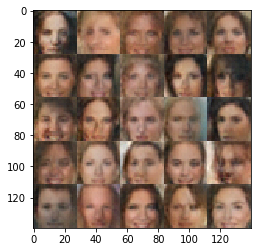

Epoch 1/1... Discriminator Loss: 1.7523... Generator Loss: 0.3411
Epoch 1/1... Discriminator Loss: 1.9787... Generator Loss: 0.2300


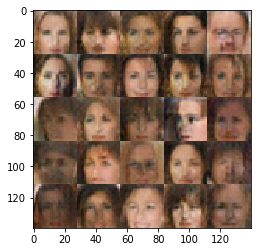

Epoch 1/1... Discriminator Loss: 1.8176... Generator Loss: 0.3635
Epoch 1/1... Discriminator Loss: 2.0318... Generator Loss: 0.2208


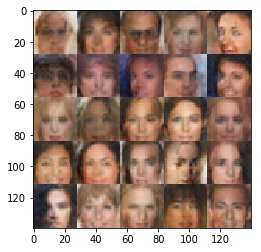

Epoch 1/1... Discriminator Loss: 1.6965... Generator Loss: 0.3833
Epoch 1/1... Discriminator Loss: 2.1757... Generator Loss: 0.1983


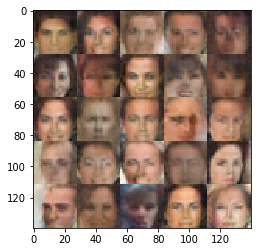

Epoch 1/1... Discriminator Loss: 1.0274... Generator Loss: 1.3758
Epoch 1/1... Discriminator Loss: 1.6485... Generator Loss: 0.3953


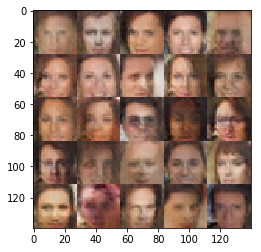

Epoch 1/1... Discriminator Loss: 1.8127... Generator Loss: 0.3338
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.5936


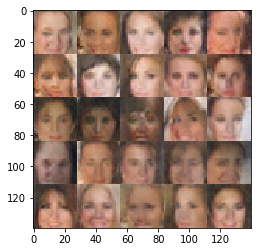

Epoch 1/1... Discriminator Loss: 1.1279... Generator Loss: 0.8845
Epoch 1/1... Discriminator Loss: 2.0383... Generator Loss: 0.2176


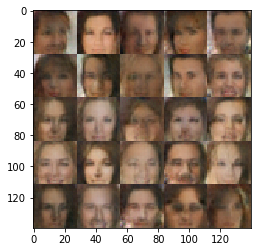

Epoch 1/1... Discriminator Loss: 1.7536... Generator Loss: 0.3583
Epoch 1/1... Discriminator Loss: 1.6911... Generator Loss: 0.4772


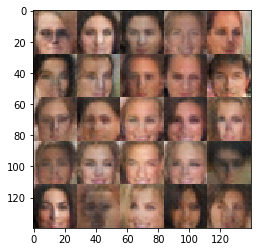

Epoch 1/1... Discriminator Loss: 1.7708... Generator Loss: 0.4538
Epoch 1/1... Discriminator Loss: 1.7020... Generator Loss: 0.3752


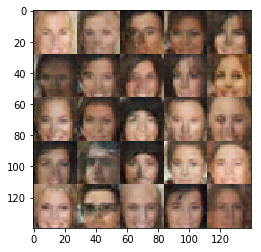

Epoch 1/1... Discriminator Loss: 1.7338... Generator Loss: 0.3246
Epoch 1/1... Discriminator Loss: 1.8517... Generator Loss: 0.3066


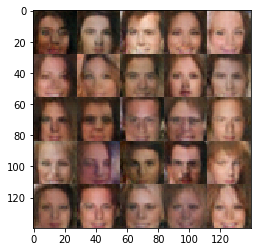

Epoch 1/1... Discriminator Loss: 1.6410... Generator Loss: 0.3648
Epoch 1/1... Discriminator Loss: 1.9546... Generator Loss: 0.2816


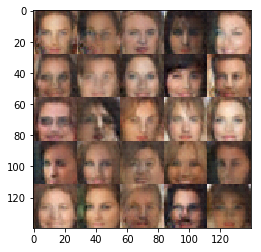

Epoch 1/1... Discriminator Loss: 1.5462... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.9332... Generator Loss: 0.2552


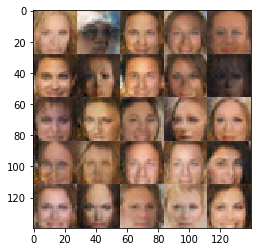

Epoch 1/1... Discriminator Loss: 1.7173... Generator Loss: 0.4009
Epoch 1/1... Discriminator Loss: 2.0163... Generator Loss: 0.2312


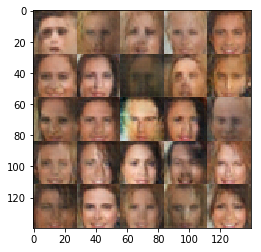

Epoch 1/1... Discriminator Loss: 2.2803... Generator Loss: 0.1606
Epoch 1/1... Discriminator Loss: 1.8693... Generator Loss: 0.5866


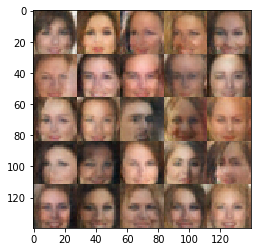

Epoch 1/1... Discriminator Loss: 1.7152... Generator Loss: 0.3588
Epoch 1/1... Discriminator Loss: 1.7113... Generator Loss: 0.3529


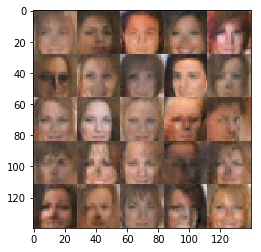

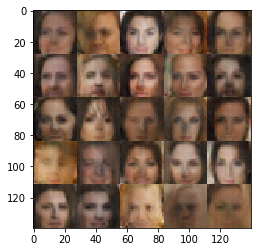

In [65]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3
alpha =0.11

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.